# A. Generate Random Data with Some Rules

In [1]:
import pandas as pd
import random
import numpy as np
pd.set_option('display.max_rows', 10)
data = pd.read_csv("sidoarjo.csv", delimiter=";")
data

,tahun,provinsi,kabupaten,kecamatan,kelurahan
0,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO
1,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,KEDUNGBOCOK
2,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,SINGOGALIH
3,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,TARIK
4,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MERGOBENER
...,...,...,...,...,...
344,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,PENAMBANGAN
345,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,WARUBERON
346,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BOGEMPINGGIR
347,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,KEDUNGSUKODANI


In [2]:
data = data.drop(columns=["tahun"])
kec_adm_tarik = data[data["kecamatan"] == "TARIK"]
kec_adm_prambon = data[data["kecamatan"] == "PRAMBON"]
kec_adm_krembung = data[data["kecamatan"] == "KREMBUNG"]
kec_adm_porong = data[data["kecamatan"] == "PORONG"]
kec_adm_jabon = data[data["kecamatan"] == "JABON"]
kec_adm_tanggulangin = data[data["kecamatan"] == "TANGGULANGIN"]
kec_adm_candi = data[data["kecamatan"] == "CANDI"]
kec_adm_tulangan = data[data["kecamatan"] == "TULANGAN"]
kec_adm_wonoayu = data[data["kecamatan"] == "WONOAYU"]
kec_adm_sukodono = data[data["kecamatan"] == "SUKODONO"]
kec_adm_sidoarjo = data[data["kecamatan"] == "SIDOARJO"]
kec_adm_buduran = data[data["kecamatan"] == "BUDURAN"]
kec_adm_sedati = data[data["kecamatan"] == "SEDATI"]
kec_adm_waru = data[data["kecamatan"] == "WARU"]
kec_adm_gedangan = data[data["kecamatan"] == "GEDANGAN"]
kec_adm_krian = data[data["kecamatan"] == "KRIAN"]
kec_adm_balongbendo = data[data["kecamatan"] == "BALONGBENDO"]
kec_adm_tarik

,provinsi,kabupaten,kecamatan,kelurahan
0,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO
1,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,KEDUNGBOCOK
2,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,SINGOGALIH
3,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,TARIK
4,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MERGOBENER
...,...,...,...,...
15,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MINDUGADING
16,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,KEMUNING
17,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,JANTI
18,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,SEGODOBANCANG


In [3]:
suara_1 = 373_673
suara_2 = 387_688
suara_3 = 212_977
golput = 4_257

total_tps_tarik = 112
total_tps_jprambon = 139
total_tps_krembung = 125
total_tps_porong = 124
total_tps_jabon = 99
total_tps_tanggulangin = 152
total_tps_candi = 261
total_tps_tulangan = 175
total_tps_wonoayu = 145
total_tps_sukodono = 208
total_tps_sidoarjo = 361
total_tps_buduran = 167
total_tps_sedati = 165
total_tps_waru = 363
total_tps_gedangan = 207
total_tps_taman = 365
total_tps_krian = 221
total_tps_balongbendo = 132
data

,provinsi,kabupaten,kecamatan,kelurahan
0,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO
1,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,KEDUNGBOCOK
2,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,SINGOGALIH
3,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,TARIK
4,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MERGOBENER
...,...,...,...,...
344,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,PENAMBANGAN
345,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,WARUBERON
346,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BOGEMPINGGIR
347,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,KEDUNGSUKODANI


In [4]:
def generate_tps(data, total_suara_1, total_suara_2, total_suara_3, total_golput):
  kelurahan = data["kelurahan"].unique()
  kelurahan_tps = []
  for kel in kelurahan:
    kelurahan_tps.append({
      "kelurahan": kel,
      "jml_tps": random.randint(4, 7)
    })

  tps = []

  for kel in kelurahan_tps:
    for i in range(kel["jml_tps"]):
      tps.append({
          "kelurahan": kel["kelurahan"],
          "no_tps": i+1,
          "suara_1": 0,
          "suara_2": 0,
          "suara_3": 0,
          "golput": 0
      })

  random_suara_1 = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * total_suara_1).tolist()
  random_suara_2 = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * total_suara_2).tolist()
  random_suara_3 = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * total_suara_3).tolist()
  random_golput = (np.random.dirichlet(np.ones(len(tps)),size=1)[0] * total_golput).tolist()

  random_suara_1 = [round(i) for i in random_suara_1]
  random_suara_2 = [round(i) for i in random_suara_2]
  random_suara_3 = [round(i) for i in random_suara_3]
  random_golput = [round(i) for i in random_golput]

  for i in range(len(tps)):
    tps[i]["suara_1"] = random_suara_1[i]
    tps[i]["suara_2"] = random_suara_2[i]
    tps[i]["suara_3"] = random_suara_3[i]
    tps[i]["golput"] = random_golput[i]
  
  tps.append({
    "kelurahan": "TOTAL",
    "no_tps": sum([kel["jml_tps"] for kel in kelurahan_tps]),
    "suara_1": sum([t["suara_1"] for t in tps]),
    "suara_2": sum([t["suara_2"] for t in tps]),
    "suara_3": sum([t["suara_3"] for t in tps]),
    "golput": sum([t["golput"] for t in tps])
  })

  return pd.DataFrame(tps)

In [5]:
generate = generate_tps(data, suara_1, suara_2, suara_3, golput)
generate

total_row = pd.DataFrame([{
  "provinsi": "TOTAL",
  "kabupaten": len(data["kabupaten"].unique()),
  "kecamatan": len(data["kecamatan"].unique()),
  "kelurahan": len(data["kelurahan"].unique()),
  "no_tps": len(generate["kelurahan"].unique()) * len(generate["no_tps"].unique()),
  "suara_1": generate["suara_1"].sum(),
  "suara_2": generate["suara_2"].sum(),
  "suara_3": generate["suara_3"].sum(),
  "golput": generate["golput"].sum()
}])

completed_data= pd.merge(data, generate, on="kelurahan", how="outer")
completed_data

,provinsi,kabupaten,kecamatan,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,1,391,152,25,5
1,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,2,345,70,47,2
2,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,3,562,353,131,1
3,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,4,38,120,172,1
4,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,5,171,181,55,0
...,...,...,...,...,...,...,...,...,...
1905,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,2,50,548,165,0
1906,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,3,24,51,51,2
1907,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,4,118,18,83,4
1908,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,5,327,296,49,4


# B. Menghitung estimasi parameter dan selisih proporsi dengan parameter menggunakan metode random sampling

In [7]:
# estimasi parameter
estimation_parameter_data = []

for i in range(1, 20):  
  random_sampling = completed_data.sample(frac=i/20, random_state=42).reset_index(drop=True)

  # sum all suara_1, suara_2, and golput
  suara_1 = random_sampling["suara_1"].sum()
  suara_2 = random_sampling["suara_2"].sum()
  suara_3 = random_sampling["suara_3"].sum()
  golput = random_sampling["golput"].sum()

  # calculate percentage of suara_1, suara_2, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i/20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,38.003432,36.561337,24.951320,0.483911
1,10,37.909177,38.688383,22.935479,0.466961
2,15,36.291731,39.110169,24.146764,0.451335
3,20,35.650076,39.492511,24.401038,0.456375
4,25,36.095542,39.562080,23.905005,0.437372
...,...,...,...,...,...
14,75,38.060168,39.581137,21.930353,0.428342
15,80,38.097228,39.537457,21.934730,0.430585
16,85,38.107353,39.520394,21.942245,0.430009
17,90,38.184555,39.473271,21.913783,0.428391


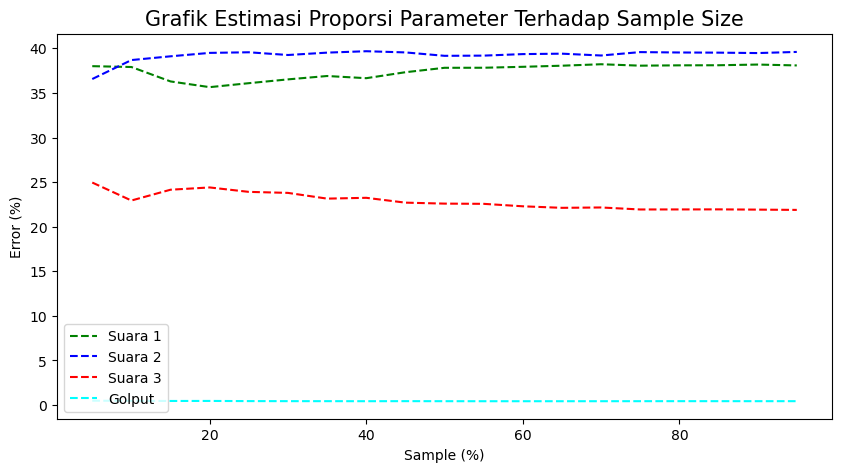

In [8]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label="Suara 1", color="green", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label="Suara 2", color="blue", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label="Suara 3", color="red", linestyle="dashed")
plt.plot(x, estimation_parameter_data["golput"], label="Golput", color="cyan", linestyle="dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size=15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [9]:
# hitung eror estimasi parameter suara_1, suara_2, dan golput terhadap total_suara_1_provinsi, total_suara_2_provinsi, dan total_golput_provinsi
percentage_suara_1_provinsi = (completed_data["suara_1"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_2_provinsi = (completed_data["suara_2"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_3_provinsi = (completed_data["suara_3"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_golput_provinsi = (completed_data["golput"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100*(estimation_parameter_data["suara_1"]-percentage_suara_1_provinsi)/percentage_suara_1_provinsi)
error_suara_2 = abs(100*(estimation_parameter_data["suara_2"]-percentage_suara_2_provinsi)/percentage_suara_2_provinsi)
error_suara_3 = abs(100*(estimation_parameter_data["suara_3"]-percentage_suara_3_provinsi)/percentage_suara_3_provinsi)
error_golput = abs(100*(estimation_parameter_data["golput"]-percentage_golput_provinsi)/percentage_golput_provinsi)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
  "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,0.419879,7.644439,14.361202,12.342308
1,10,0.666854,2.271427,5.121851,8.407217
2,15,4.905036,1.205976,10.673624,4.779635
3,20,6.586360,0.240166,11.839056,5.949707
4,25,5.419109,0.064429,9.565553,1.538081
...,...,...,...,...,...
14,75,0.271213,0.016292,0.514984,0.558328
15,80,0.174106,0.126628,0.535047,0.037727
16,85,0.147576,0.169731,0.569490,0.171456
17,90,0.054716,0.288766,0.439041,0.546989


<Figure size 1000x500 with 0 Axes>

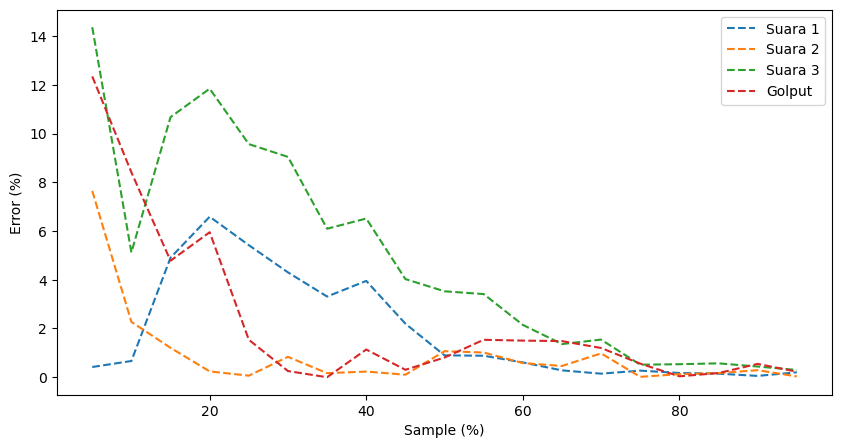

In [10]:
# display estimation persentase error of proportion
fig = plt.figure(figsize=(10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize=(10, 5))
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_1"], label="Suara 1", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_2"], label="Suara 2", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_3"], label="Suara 3", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_golput"], label="Golput", linestyle="dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

# Menghitung estimasi parameter dengan cluster random sampling

In [11]:
print(completed_data.columns)


Index(['provinsi', 'kabupaten', 'kecamatan', 'kelurahan', 'no_tps', 'suara_1',
       'suara_2', 'suara_3', 'golput'],
      dtype='object')


In [12]:
# make cluster sampling from completed_data
cluster_sampling = completed_data.groupby(["provinsi", "kabupaten", "kecamatan"]).apply(lambda x: x.sample(frac=.1, replace=False))
cluster_sampling = cluster_sampling.reset_index(drop=True)
cluster_sampling

,provinsi,kabupaten,kecamatan,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,JABARAN,2,51,11,51,3
1,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,WARUBERON,4,89,79,162,3
2,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,SINGKALAN,1,415,46,70,1
3,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BALONGBENDO,3,627,77,228,2
4,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,WONOKUPANG,5,13,139,7,0
...,...,...,...,...,...,...,...,...,...
187,PROVINSI JAWA TIMUR,SIDOARJO,WONOAYU,KETIMANG,4,31,80,27,2
188,PROVINSI JAWA TIMUR,SIDOARJO,WONOAYU,SAWOCANGKRING,4,244,618,229,1
189,PROVINSI JAWA TIMUR,SIDOARJO,WONOAYU,LAMBANGAN,1,227,298,442,1
190,PROVINSI JAWA TIMUR,SIDOARJO,WONOAYU,WONOAYU,1,479,258,7,0


In [13]:
# estimasi parameter
estimation_parameter_data = []
estimasi_suara_1 = []
estimasi_suara_2 = []
estimasi_suara_3 = []
estimasi_golput = []

for i in range(1, 20):
  cluster_sampling = completed_data.groupby(["provinsi", "kabupaten", "kecamatan"]).apply(lambda x: x.sample(frac=i/20, replace=False))

  # sum all suara_1, suara_2, and golput
  suara_1 = cluster_sampling["suara_1"].sum()
  suara_2 = cluster_sampling["suara_2"].sum()
  suara_3 = cluster_sampling["suara_3"].sum()
  golput = cluster_sampling["golput"].sum()

  # append to list
  estimasi_suara_1.append(suara_1)
  estimasi_suara_2.append(suara_2)
  estimasi_suara_3.append(suara_3)
  estimasi_golput.append(golput)

  # calculate percentage of suara_1, suara_2, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i/20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,37.638632,39.521719,22.462261,0.377388
1,10,38.212314,39.757784,21.581909,0.447993
2,15,39.127302,39.979744,20.459916,0.433038
3,20,35.131094,40.748142,23.682204,0.438559
4,25,38.407669,40.218473,20.933850,0.440009
...,...,...,...,...,...
14,75,38.394357,39.375295,21.795392,0.434957
15,80,37.557376,40.106750,21.898998,0.436876
16,85,38.264729,39.535542,21.767578,0.432151
17,90,37.956349,39.605314,22.010233,0.428104


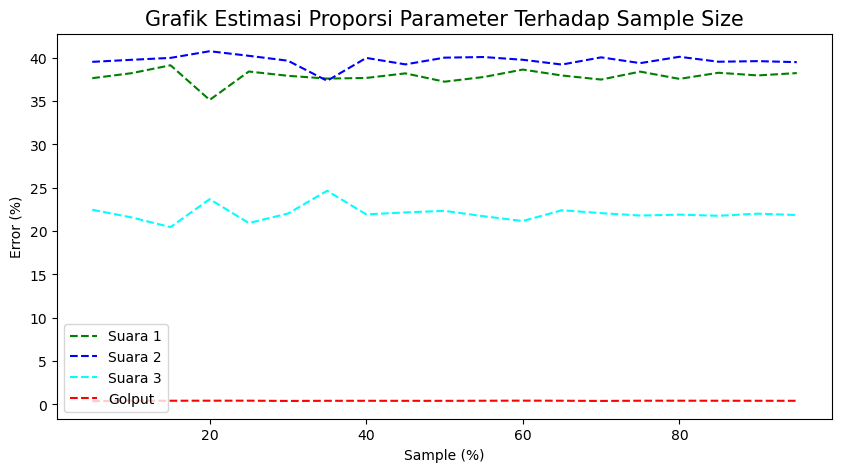

In [14]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label="Suara 1", color="green", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label="Suara 2", color="blue", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label="Suara 3", color="cyan", linestyle="dashed")
plt.plot(x, estimation_parameter_data["golput"], label="Golput", color="red", linestyle="dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size=15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [15]:
# hitung eror estimasi parameter suara_1, suara_2, dan golput terhadap total_suara_1_provinsi, total_suara_2_provinsi, dan total_golput_provinsi
percentage_suara_1_provinsi = (completed_data["suara_1"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_2_provinsi = (completed_data["suara_2"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_3_provinsi = (completed_data["suara_3"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100 
percentage_golput_provinsi = (completed_data["golput"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100*(estimation_parameter_data["suara_1"]-percentage_suara_1_provinsi)/percentage_suara_1_provinsi)
error_suara_2 = abs(100*(estimation_parameter_data["suara_2"]-percentage_suara_2_provinsi)/percentage_suara_2_provinsi)
error_suara_3 = abs(100*(estimation_parameter_data["suara_3"]-percentage_suara_3_provinsi)/percentage_suara_3_provinsi)
error_golput = abs(100*(estimation_parameter_data["golput"]-percentage_golput_provinsi)/percentage_golput_provinsi)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
    "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,1.375760,0.166384,2.952919,12.387703
1,10,0.127455,0.429926,1.082065,4.003717
2,15,2.524989,0.990608,6.224574,0.531845
3,20,7.946244,2.931616,8.544371,1.813614
4,25,0.639341,1.593648,4.052361,2.150055
...,...,...,...,...,...
14,75,0.604460,0.536258,0.103594,0.977216
15,80,1.588674,1.311432,0.371271,1.422736
16,85,0.264796,0.131465,0.231075,0.325938
17,90,0.543250,0.044781,0.881105,0.613603


<Figure size 1000x500 with 0 Axes>

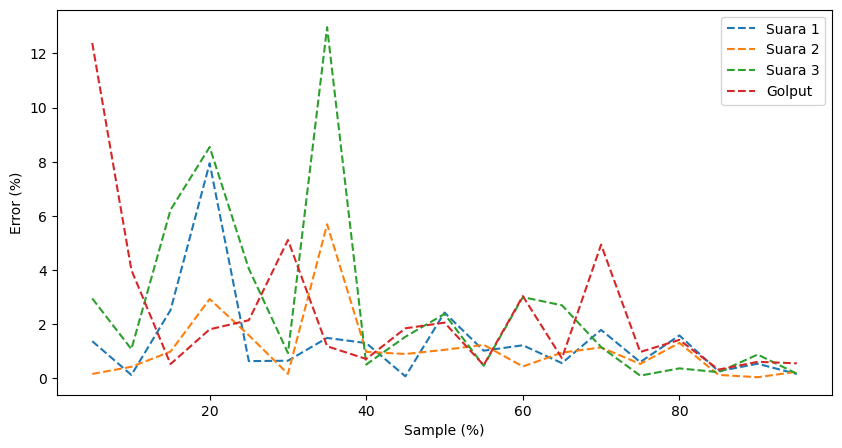

In [16]:
# display estimation persentase error of proportion
fig = plt.figure(figsize=(10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["error_suara_1"], label="Suara 1", linestyle="dashed")
plt.plot(x, estimation_parameter_data["error_suara_2"], label="Suara 2", linestyle="dashed")
plt.plot(x, estimation_parameter_data["error_suara_3"], label="Suara 3", linestyle="dashed")
plt.plot(x, estimation_parameter_data["error_golput"], label="Golput", linestyle="dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

# Menghitung estimasi parameter dengan multistage random sampling

In [17]:
# get 3 random kecamatan from each kabupaten_kota as make it to list, except for KEP SERIBU, take all kecamatan in that city
completed_data = completed_data[completed_data["provinsi"] != "TOTAL"]

# get random kelurahan from completed_data as make it to list
kelurahan_list = np.random.choice(completed_data["kelurahan"].unique(), 50, replace=False)

# take only 3 random tps from each kelurahan as dataframe from completed_data
tps = []
for kel in kelurahan_list:
  tps.append(completed_data[completed_data["kelurahan"] == kel].sample(n=2, replace=False))

# concat all tps to one dataframe
cluster_sampling = pd.concat(tps).reset_index(drop=True)
cluster_sampling

,provinsi,kabupaten,kecamatan,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PROVINSI JAWA TIMUR,SIDOARJO,KRIAN,WATUGOLONG,3,134,6,376,1
1,PROVINSI JAWA TIMUR,SIDOARJO,KRIAN,WATUGOLONG,4,391,482,135,2
2,PROVINSI JAWA TIMUR,SIDOARJO,BUDURAN,PAGERWOJO,5,19,357,370,2
3,PROVINSI JAWA TIMUR,SIDOARJO,BUDURAN,PAGERWOJO,6,15,211,149,1
4,PROVINSI JAWA TIMUR,SIDOARJO,BUDURAN,PRASUNG,4,123,231,57,0
...,...,...,...,...,...,...,...,...,...
95,PROVINSI JAWA TIMUR,SIDOARJO,PORONG,GLAGAHARUM,5,50,191,425,6
96,PROVINSI JAWA TIMUR,SIDOARJO,SIDOARJO,CEMENG BAKALAN,1,302,459,115,0
97,PROVINSI JAWA TIMUR,SIDOARJO,SIDOARJO,CEMENG BAKALAN,6,53,4,547,1
98,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,KEDINDING,3,106,137,7,4


In [18]:
# estimasi parameter
estimation_parameter_data = []
estimasi_suara_1 = []
estimasi_suara_2 = []
estimasi_suara_3 = []
estimasi_golput = []

for i in range(1, 20):  
  multistage_sampling = completed_data.sample(frac=i/20, random_state=42).reset_index(drop=True)

  # sum all suara_1, suara_2, and golput
  suara_1 = multistage_sampling["suara_1"].sum()
  suara_2 = multistage_sampling["suara_2"].sum()
  suara_3 = multistage_sampling["suara_3"].sum()
  golput = multistage_sampling["golput"].sum()

  # append to list
  estimasi_suara_1.append(suara_1)
  estimasi_suara_2.append(suara_2)
  estimasi_golput.append(golput)

  # calculate percentage of suara_1, suara_2, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i/20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,38.003432,36.561337,24.951320,0.483911
1,10,37.909177,38.688383,22.935479,0.466961
2,15,36.291731,39.110169,24.146764,0.451335
3,20,35.650076,39.492511,24.401038,0.456375
4,25,36.095542,39.562080,23.905005,0.437372
...,...,...,...,...,...
14,75,38.060168,39.581137,21.930353,0.428342
15,80,38.097228,39.537457,21.934730,0.430585
16,85,38.107353,39.520394,21.942245,0.430009
17,90,38.184555,39.473271,21.913783,0.428391


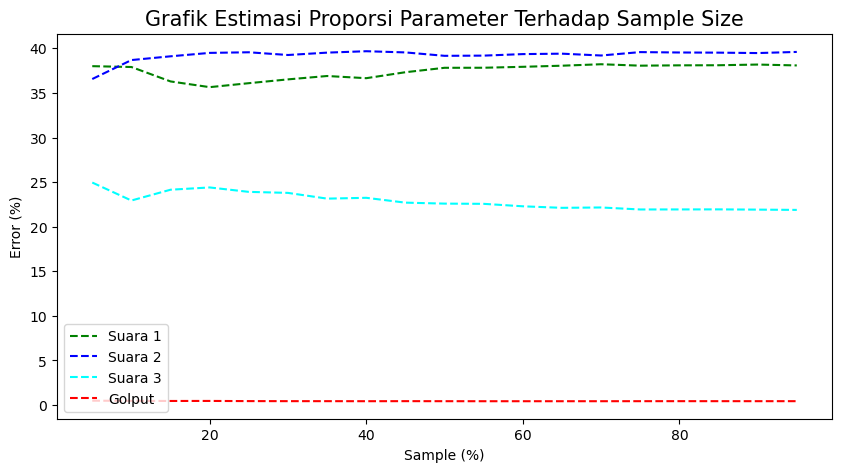

In [19]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label="Suara 1", color="green", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label="Suara 2", color="blue", linestyle="dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label="Suara 3", color="cyan", linestyle="dashed")
plt.plot(x, estimation_parameter_data["golput"], label="Golput", color="red", linestyle="dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size=15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [20]:
# hitung eror estimasi parameter suara_1, suara_2, dan golput terhadap total_suara_1_provinsi, total_suara_2_provinsi, dan total_golput_provinsi
percentage_suara_1_provinsi = (completed_data["suara_1"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_2_provinsi = (completed_data["suara_2"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_3_provinsi = (completed_data["suara_3"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100 
percentage_golput_provinsi = (completed_data["golput"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100*(estimation_parameter_data["suara_1"]-percentage_suara_1_provinsi)/percentage_suara_1_provinsi)
error_suara_2 = abs(100*(estimation_parameter_data["suara_2"]-percentage_suara_2_provinsi)/percentage_suara_2_provinsi)
error_suara_3 = abs(100*(estimation_parameter_data["suara_3"]-percentage_suara_3_provinsi)/percentage_suara_3_provinsi)
error_golput = abs(100*(estimation_parameter_data["golput"]-percentage_golput_provinsi)/percentage_golput_provinsi)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
  "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,0.419879,7.644439,14.361202,12.342308
1,10,0.666854,2.271427,5.121851,8.407217
2,15,4.905036,1.205976,10.673624,4.779635
3,20,6.586360,0.240166,11.839056,5.949707
4,25,5.419109,0.064429,9.565553,1.538081
...,...,...,...,...,...
14,75,0.271213,0.016292,0.514984,0.558328
15,80,0.174106,0.126628,0.535047,0.037727
16,85,0.147576,0.169731,0.569490,0.171456
17,90,0.054716,0.288766,0.439041,0.546989


<Figure size 1000x500 with 0 Axes>

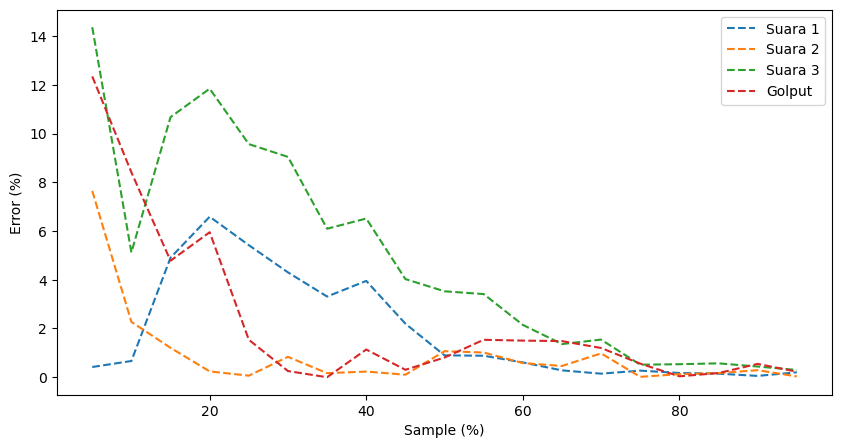

In [21]:
# display estimation persentase error of proportion
fig = plt.figure(figsize=(10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize=(10, 5))
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_1"], label="Suara 1", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_2"], label="Suara 2", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_3"], label="Suara 3", linestyle="dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_golput"], label="Golput", linestyle="dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()